## Survival


Mortality rate per year, from Savage et al. 2004

\begin{equation*}
Z = Z_ {0} M ^ {− 1/4} {e} ^ {{− E} / {kT}}
\end{equation*}

From this, want to calculate survival rate

Cumulative Distribution Function:

\begin{equation*}
1 - e ^{-\lambda x}
\end{equation*}

This is the probability you will die that year, therefore to survive is one minus this probability and as it is a year, x=1. Therefore can sub in:

\begin{equation*}
S   = {e} ^{-( Z _ {0} M ^ {− 1/4} {e} ^ {{− E} / {kT}  }) }
\end{equation*}

Divide the mortality rate to get per month.

Therefore monthly survival rate:

\begin{equation*}
S   = {e} ^{(-( Z _ {0} M ^ {− 1/4} {e} ^ {{− E} / {kT}  }) / {12})}
\end{equation*}

From Savage et al. 2004 marine adult fish line eqn y=-0.23x+19

In [2]:
survival <- function(m, TC, z0=19, E=0.45, g=-0.23){  #m: mass (g), TC: temp degrees celsius, z0: normalisation constant, E: activation energy
  Temp = TC+273.15    #to kelvin                                    
  k = 8.62*(10^(-5))  #boltzmann constant                                     
  Z <- exp(z0) * (m^g) * exp(-(E/(k*Temp)))
  Za <- (exp(-Z/12)) # /12 the initial rate- to calculate month survival rate, then e it to get probability of survival
  return(Za)    #returns mortality rate per month
}

Create values to view function into dataframe

In [3]:
set <- seq(0,10000, 0.1)

part1 <- matrix(0, nrow = length(set), ncol = 3)
part1[,1] <- rep(-5, length(set)) 
part1[,2] <- set 
part1[,3] <- survival(set,-5) 

part2 <- matrix(0, nrow = length(set), ncol = 3)
part2[,1] <- rep(0, length(set)) 
part2[,2] <- set 
part2[,3] <- survival(set,0) 

part3 <- matrix(0, nrow = length(set), ncol = 3)
part3[,1] <- rep(5, length(set))
part3[,2] <- set 
part3[,3] <- survival(set,5)

part4 <- matrix(0, nrow = length(set), ncol = 3)
part4[,1] <- rep(10, length(set))
part4[,2] <- set 
part4[,3] <- survival(set,10)

part5 <- matrix(0, nrow = length(set), ncol = 3)
part5[,1] <- rep(15, length(set)) 
part5[,2] <- set 
part5[,3] <- survival(set,15)

part6 <- matrix(0, nrow = length(set), ncol = 3)
part6[,1] <- rep(20, length(set))
part6[,2] <- set 
part6[,3] <- survival(set,20)

whole <- rbind(part1, part2, part3, part4,part5, part6)
colnames(whole) <-  c("Temperature","Mass","Survival")
whole <- as.data.frame(whole)

Plot

Loading required package: ggplot2
Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 6 rows containing missing values (geom_path).”

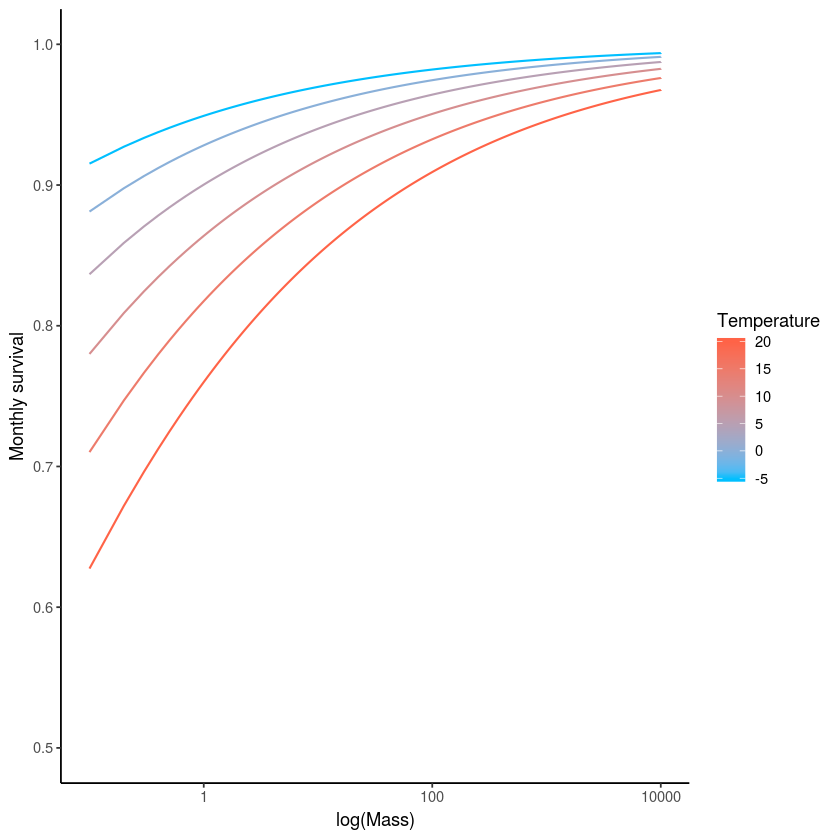

In [4]:
require(ggplot2)
ggplot(whole, aes(x= Mass, y= Survival, group = Temperature, colour = Temperature))+
  geom_line(cex = 0.6)+
  scale_x_log10()+
  ylim(0.50, 1.0)+
  xlab("log(Mass)")+
  ylab("Monthly survival")+
  scale_color_gradient(low = "deepskyblue", high = "tomato")+
  theme_classic()

## Development

Effect of size and temperature on development time.


Allometric model for the for the effect of body size on growth, formulated based on the allocation of metabolic energy at the cellular level. 

The model provides the basis for deriving allometric relationships for growth rates and the timing of life history events

The general equation is:

\begin{equation*}
\frac{d m}{d t} = am^{3/4}[1-(m/M)^{1/4}]
\end{equation*}

mass of organism (m) as function of time (t) 
expressed in terms of asymptotic mass (M) and 
a is related to fundamental cell properties 

From: (West et al. 2001). Ontogenetic development is fuelled by metabolism and occurs primary from cell division. 

The rate of energy transformation is the sum of two terms, one of which represents the maintenance of existing tissue, the other, the creation of new tissue. Expressed by the conservation of energy equation. 

(The first term (NcBc) is the power needed to sustain the organism in all of its activities, where as the second term (Ec dNc/dt) is the power allocated to the production of new cells and to therefore growth.
Ec Bc and the mass of a cell, mc, are assumed to be independent of mass, m, and remain constant throughout growth and development.)

At any time, t, the total body mass m=mcNC (mass is equal to mass of a cell multiplied by the total number of cell (Nc)) so the conservation of energy equation can be written as:

\begin{equation*}
\frac{d m}{d t} = \Bigl(\frac{m_c}{E_c}\Bigr) B - \Bigl(\frac{B_c}{E_c}\Bigr) m
\end{equation*}

mc - mass of a cell; Ec - is the metabolic energy required to make a cell; B - incoming rate of energy flow; Bc - is the metabolic rate of a single cell; m - body mass (m=mcNc); t - time

So, I think, the rate of change of mass and time is essentially equal to incoming rate of energy flow (multiplied by the mass of a cell over energy required to make it) minus body mass (multiplied by metabolic rate of a cell over energy required to make a cell)

Then, if the incoming rate of energy flow is equal to power law m^3/5 multiplied by bo where bo is constant for given taxon B= B0m^3/4 then: 

\begin{equation*}
\frac{d m}{d t} = B_0 \Bigl(\frac{m_c}{E_c}\Bigr)m^{3/4} - \Bigl(\frac{B_c}{E_c}\Bigr)m
\end{equation*}

a= B0 mc/Ec
b= Bc/Ec

\begin{equation*}
\frac{d m}{d t} = a m^{3/4} - b m
\end{equation*}

So the reason for the different exponents of m on the two m's of the above eqn (m^3/4 and m) is that the network constraints the total number of capillaries to scale differently from the total number of cells supplied. It's this balance between supply and demand that ultimately limits growth, i.e if the exponents were the same, dm/dt wouldnt be equal to zero and organisms would continue to grow indefinitely.

so determinate (having limits) growth reaches an Asymptotic maximum body size, M. Occurring when dm/dt =0


Then this...
 This occurs when dm/dt = 0, giving M = (a/b)^4 = (B0mc/Bc)4. Thus, the variation in M among species within a taxon, where B0 and mc do not change, is determined by the systematic variation of the in vivo cellular metabolic rate, Bc, which scales as M-1/4. Within a taxon B0, mc and Ec are approximately constant, so a should be approximately independent of M, whereas b ( = a/M^1/4) should scale as M^-1/4. Between groups, a should vary, principally reflecting variations in B0

And because of this, the above eqn can be written as the first general equation ^^^

And by integrating that eqn, a classical sigmoidal curve can be obtained:

\begin{equation*}
\Bigl(\frac{m}{M}\Bigr)^{1/4} = 1- [1-\Bigl(\frac{m_0}{M}\Bigr)^{1/4}] e^{-at/4M^{1/4}}
\end{equation*}



mo is mass at birth where t=0
they plotted this with diff animals and fitted eqn to data





Back to general eqn.

We know, a= B0 mc/Ec.

B0 is the normalisation factor for metabolic rate B, which scales with mass as B=B0m^3/4 and varies with temperature via boltzmanns factor exp (-E/kT) .

As a ∝ B0 it has the same temperature dependence,  a(T) ∝ exp(-Ē/kT)

the value of a(T) at some temperature T is related to its value at some arbitrary temperature T0

\begin{equation*}
a(T)/a(T_0) = [exp(-E/kT)]/[exp(-E/kT_0)]
\end{equation*}

\begin{equation*}
a(T)= a(T_0)e^{(E/kT_0)((T-T_0)/T)}
\end{equation*}

If you express ^that^ in terms of degree celsius, Tc = T - 273

They set T0 to be 273 kelvin as this is 0 degrees celsius where water freezes and biological reactions cease

\begin{equation*}
a(T_c) = a(T_0)e^{(E/kT_0^2)(T_c/(1+T_c/T_0))}
\end{equation*}

*Question 1. why can we have kelvin and degrees c in one equation? should it not be taken as 0 or we convert temp degrees c to kelvin 2. whats happened mathematically i.e the new squared term. I have been using a(T_c) as my sub in for a(T)*
 

Throughout developement, the mass of the embryo, body mass m, is small compared to adult mass M (I think big M is size you could get to?)

This means that the first general equation can be approximated by dm/dt = am^3/4? *not sure of the meaning of this step* - weve got rid of that entire second term, so one minus something to the quarter must be one? Is this an assumption?

When you integrate dm/dt = am^3/4 from mass is zero, m= 0 and and at time 0, t = 0 at a fixed temperature, this gives:

\begin{equation*}
m = \left(\frac{ a(T)t} { 4}\right) ^4  or 
\frac{t}{m^{1/4}}  = \frac{4 }{ a(T)}
\end{equation*}

and you sub in a(T) to now relate this to temperature

which provides a general expression relating development time (t) to body mass (m) and temperature (Tc in celsius?)

Taking log of both sides, plots of ln(t/m^1/4) versus Tc/1+Tc/T0 should yield universal straight line with slope of alpha= -E/kT0^2 and yint = ln(4/a(T0))


Therefore, development time: (when you are a given mass under what temp do you grow, from what to what?), is it zero grams to given mass? because we assumed this earlier? 
why does zero have the weird jump in graph

\begin{equation*}
t = m^{1/4} \Bigl(\frac{4}{a(t)}\Bigr)
\end{equation*}

\begin{equation*}
t = m^{1/4} \left(\frac{4}{a(T_0)e^{(E/kT_0^2)(T_c/(1+T_c/T_0))}}\right)
\end{equation*}

so:

\begin{equation*}
t = m^{1/4} \frac{4}{a(T_0)} \frac {1}{ e^{(E/kT_0^2)(T_c/(1+T_c/T_0))}}
\end{equation*}

\begin{equation*}
t = m^{1/4} \frac{4}{a(T_0)} e^{-(E/kT_0^2)(T_c/(1+T_c/T_0))}
\end{equation*}

i.e. for their data/plot (figure 1b / 2 (adult marine fish vs embryo)) y = -0.13 x + 5.73
(mass-corrected embryonic development time is given as t/m 1/4, in d per (mass at hatch in g)1/4)


\begin{equation*}
t = m^{1/4} e^ {log(4/a(T_0) } e^{\alpha(T_c/(1+T_c/T_0))}
\end{equation*}

\begin{equation*}
t = m^{1/4} e^{5.73} e^{-0.13(T_c/(1+T_c/T_0))}
\end{equation*}

In [2]:
#1. Development time (day?)
development_timeday <- function(m, Tc, t0= 5.73, a=-0.13){
  t <-  m^0.25 * exp(t0) * exp(a* Tc/(1+(Tc/273)) )         
  return(t)   #time in days
}

#2. Development time (month (/30)?)
development_timemonth <- function(m, Tc, t0= 5.73, a=-0.13){
  t <-  m^0.25 * exp(t0) * exp(a* Tc/(1+(TC/273)) )          
  return(t/30)  #per month                         
}

Warning message:
“Transformation introduced infinite values in continuous x-axis”

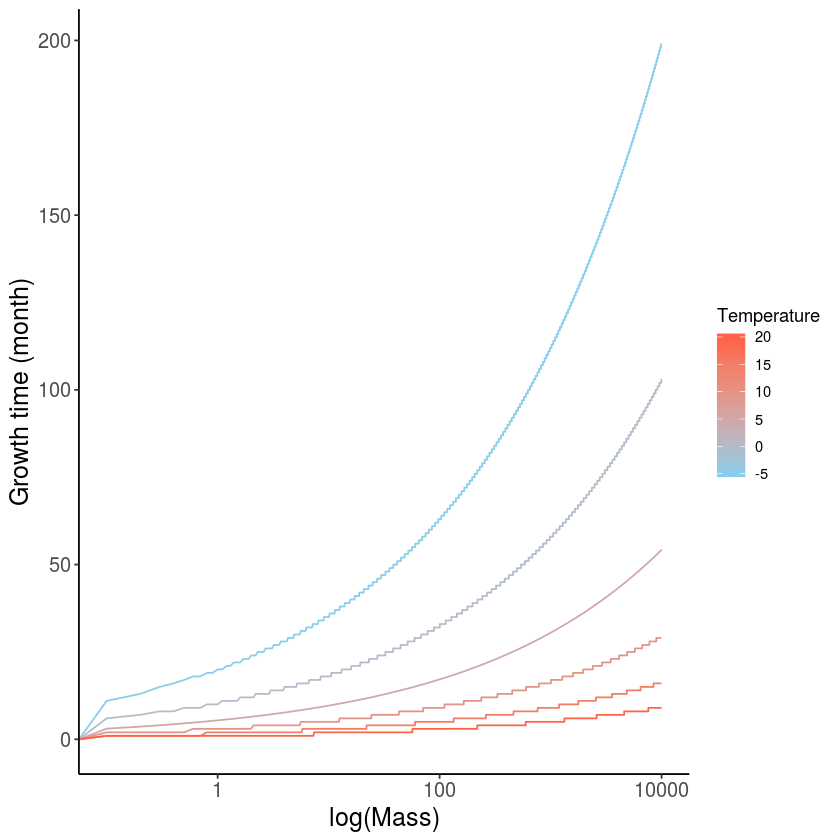

In [3]:
#plot
require(ggplot2)
set <- seq(0,10000, 0.1)

#plot of growth time per month#
part1 <- matrix(0, nrow = length(set), ncol = 3)
part1[,1] <- rep(-5, length(set)) 
part1[,2] <- set 
part1[,3] <- round(development_timemonth(set,-5))

part2 <- matrix(0, nrow = length(set), ncol = 3)
part2[,1] <- rep(0, length(set)) 
part2[,2] <- set 
part2[,3] <- round(development_timemonth(set,0))

part3 <- matrix(0, nrow = length(set), ncol = 3)
part3[,1] <- rep(5, length(set))
part3[,2] <- set 
part3[,3] <- round(development_timemonth(set,5) , digits = 4)

part4 <- matrix(0, nrow = length(set), ncol = 3)
part4[,1] <- rep(10, length(set))
part4[,2] <- set 
part4[,3] <- round(development_timemonth(set,10))

part5 <- matrix(0, nrow = length(set), ncol = 3)
part5[,1] <- rep(15, length(set)) 
part5[,2] <- set 
part5[,3] <- round(development_timemonth(set,15))

part6 <- matrix(0, nrow = length(set), ncol = 3)
part6[,1] <- rep(20, length(set))
part6[,2] <- set 
part6[,3] <- round(development_timemonth(set,20))


whole <- rbind(part1, part2, part3, part4,part5, part6)
colnames(whole) <-  c("Temperature","Mass","Growth.Time")
whole <- as.data.frame(whole)


ggplot(whole, aes(x= Mass, y= Growth.Time, group=Temperature, colour = Temperature))+
  geom_line(cex = 0.5)+
  scale_x_log10()+
  theme_classic()+
  theme(plot.title = element_text(hjust = 0.5))+
  labs(x="log(Mass)",y="Development time (month)") +
  theme(axis.title  = element_text(size = 15))+
  theme(axis.text  = element_text(size = 12))+
  scale_color_gradient(low = "skyblue", high = "tomato")

Soooo, we want the body mass given you are a certain mass after an amount of time

so we now know development time, can put this into equation 4 from gillooly 2002:

\begin{equation*}
m = \Bigl(\frac{ a(T)t} { 4}\Bigr) ^4
\end{equation*}

\begin{equation*}
m = \Bigl(\frac{ a(T_0)e^{(E/kT_0^2)(T_c/(1+T_c/T_0))} t} { 4}\Bigr) ^4
\end{equation*}





I can't get this to be 4/a(To) and minus the exponent again, where I can then input the eqn of line data..

Anyway, so I am trying to calculate what mass you would be after time passes at certain temperatures, so I need to know initial mass? temps

so, this would give me mass after whatever time you put in? from zero time to t time.. 

I'm saying after month, what size would I be from 0g..? but I wont be from 0g each time, I need to be able to chnage the initial mass?

If I input mass

I.e 10g

how big will I be after a month 

so if i put 10g to get development time and then plus thirty say to this time as it is in days and i want after a month, this gives me new development time, t. at plus a month from there, I can then input this into mass calculator to give me the new mass at this time?

i.e:

In [ ]:
#3. Mass reached in a day?
development_mass <- function(t, Tc, t0=5.73, g=-0.13){        
  m <- 
  return(m)
}

#mass after a month (say 30 days) #could make this chnage depending on which month etc
newmass <- function(initialmass, time = 30, Tc){
    t <- development_timeday(initialmass, Tc)  + time
    end_mass<- development_mass(t, Tc)
    return(end_mass)
}



## Fecundity